In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB as GNB, MultinomialNB as MNB, ComplementNB as CNB, CategoricalNB as catNB
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn import preprocessing
from pprint import pprint
from time import time
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("finaldata.csv")

In [3]:
data = data.drop('Unnamed: 0', axis = 1)

In [4]:
data = data.drop('FBI Code', axis = 1)

In [ ]:
data.head()

In [ ]:
data.columns

In [5]:
labelEncoder = preprocessing.LabelEncoder()

In [6]:
data['Primary Type'] = labelEncoder.fit_transform(data['Primary Type'])
data['Location Description'] = labelEncoder.fit_transform(data['Location Description'])
data['Arrest'] = labelEncoder.fit_transform(data['Arrest'])
data['Domestic'] = labelEncoder.fit_transform(data['Domestic'])
data['temp'] = labelEncoder.fit_transform(data['temp'])
data['number_of_complaints'] = labelEncoder.fit_transform(data['number_of_complaints'])
#data['FBI Code'] = labelEncoder.fit_transform(data['FBI Code'])

In [ ]:
data.head()

In [7]:

''''X = data[[ 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'Ward',"FBI Code",'Year', 'Community Area', 'temp',
       'number_of_complaints', 'month']]'''







X = data[[ 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'Ward','Year', 'Community Area', 'temp',
       'number_of_complaints', 'month']]

y = data['Primary Type']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [ ]:
normal

In [12]:
catnb = catNB().fit(X_train, y_train)
catnb.score(X_test, y_test)

0.39378359429773313

In [9]:
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif

In [10]:
for i in range(2,11):
    select = SelectKBest(score_func=chi2,k=i)
    X_train_new = select.fit_transform(X_train,y_train)
    X_test_new = select.transform(X_test)
    
    catnb = catNB().fit(X_train_new, y_train)
    print(catnb.score(X_test_new, y_test))

0.3280780915742355
0.37992855473575265
0.41294951834797594
0.40459283646944316
0.39047713212237634
0.39164819756079394
0.3926600391896022
0.3928115586213273
0.39378359429773313


In [11]:
for i in range(2,11):
    select = SelectKBest(k=i)
    X_train_new = select.fit_transform(X_train,y_train)
    X_test_new = select.transform(X_test)
    
    catnb = catNB().fit(X_train_new, y_train)
    print(catnb.score(X_test_new, y_test))

0.365305645511301
0.40849510386785454
0.40914740786206083
0.4101078869716402
0.41437996450849923
0.4045440420761757
0.39288218208526693
0.3932648328535218
0.39378359429773313


In [ ]:
f

In [12]:
select = SelectKBest(k = 6)
X_train_new = select.fit_transform(X_train,y_train)
X_test_new = select.transform(X_test)

In [13]:
X_train_new

array([[ 145,    0,    0,    3, 2008,    7],
       [ 145,    0,    1,   10, 2019,    2],
       [ 173,    0,    0,   44, 2012,    6],
       ...,
       [ 173,    0,    0,   28, 2013,    5],
       [ 173,    0,    0,   27, 2010,    8],
       [  75,    1,    0,   15, 2011,    5]], dtype=int64)

In [14]:
X_train


,Location Description,Arrest,Domestic,Beat,Ward,Year,Community Area,temp,number_of_complaints,month
61176,145,0,0,213,3,2008,3,4,7,3
3525327,145,0,1,434,10,2019,51,3,2,11
1623711,173,0,0,1923,44,2012,6,7,6,5
262918,150,0,0,2211,19,2008,72,8,8,8
3303865,169,0,0,1833,42,2018,8,3,1,4
...,...,...,...,...,...,...,...,...,...,...
2762330,169,0,0,1724,33,2016,14,3,2,4
518763,136,0,0,1222,25,2009,32,4,7,4
2035657,173,0,0,1123,28,2013,27,7,5,8
908491,173,0,0,111,27,2010,28,5,8,4


In [15]:
select = SelectKBest(k=6)
X_train_new = select.fit_transform(X_train,y_train)
X_test_new = select.transform(X_test)
catnb = catNB(alpha = 0).fit(X_train_new, y_train)
print(catnb.score(X_test_new, y_test))

C:\Users\99645\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


0.414067937204184


In [16]:
select = SelectKBest(k=6)
X_train_new = select.fit_transform(X_train,y_train)
X_test_new = select.transform(X_test)
catnb = catNB().fit(X_train_new, y_train)
print(catnb.score(X_test_new, y_test))

0.41437996450849923


In [21]:
select = SelectKBest(k=6)
X_train_new = select.fit_transform(X_train,y_train)
X_test_new = select.transform(X_test)
catnb = catNB(alpha = 5).fit(X_train_new, y_train)
print(catnb.score(X_test_new, y_test))

0.4146521858604121


In [22]:
y_pred = catnb.predict(X_test_new)
print(classification_report(y_test, y_pred))

C:\Users\99645\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1137
           1       0.21      0.00      0.01     50618
           2       0.45      0.60      0.51    141561
           3       0.32      0.52      0.40     45633
           4       0.00      0.00      0.00       127
           5       0.00      0.00      0.00      3389
           6       0.23      0.10      0.14     86008
           7       0.03      0.01      0.01       349
           8       0.33      0.16      0.21     20334
           9       0.36      0.23      0.28     38027
          10       0.00      0.00      0.00      1304
          11       1.00      0.22      0.36      1349
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00      2712
          14       0.00      0.00      0.00       411
          15       0.00      0.00      0.00       552
          16       0.37      0.05      0.09      1141
          17       0.29    

In [26]:
from sklearn.metrics import plot_confusion_matrix

#This 

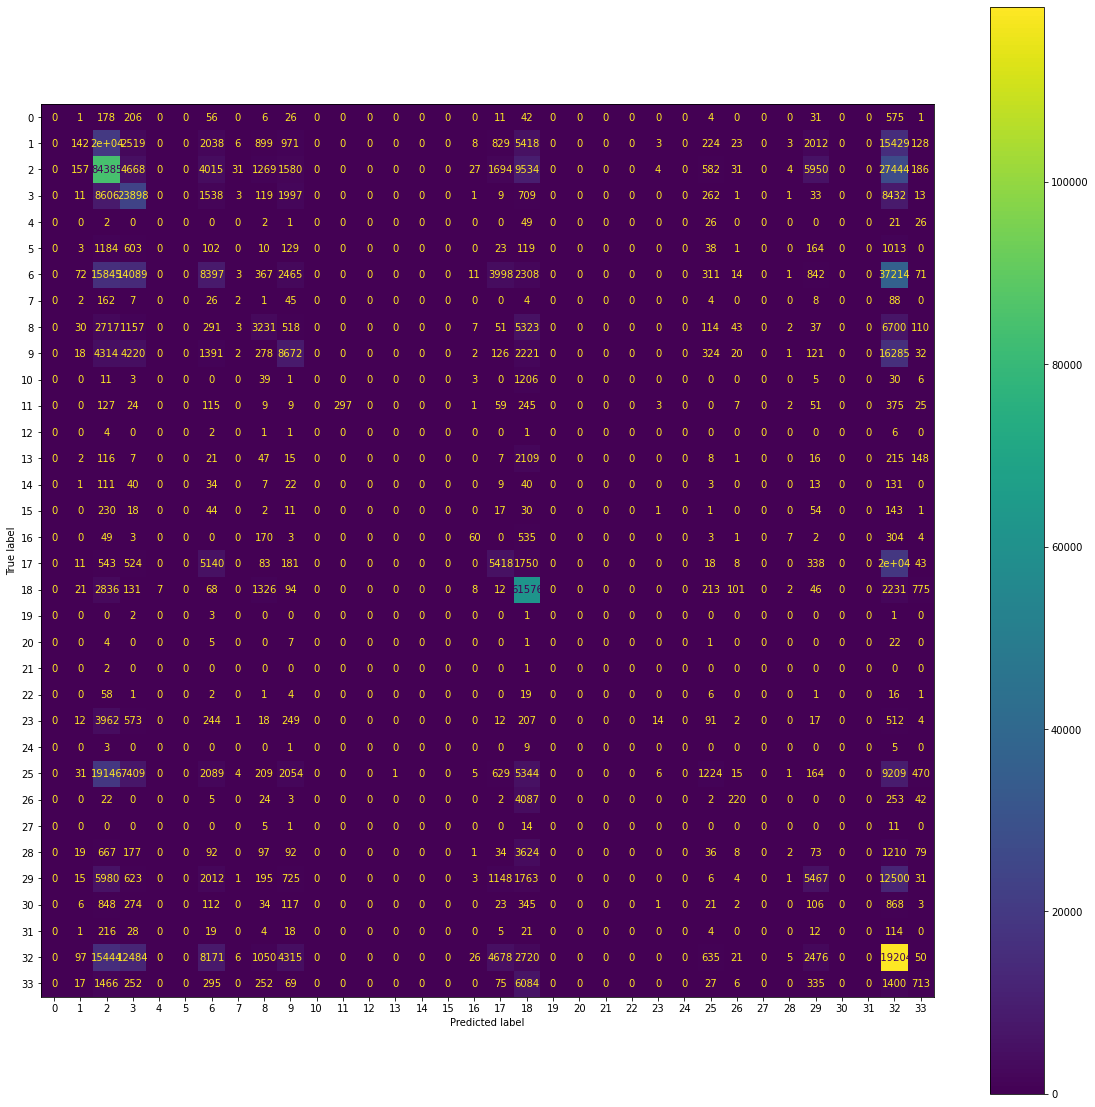

In [38]:

fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(catnb, X_test_new, y_test, ax=ax)

In [32]:
import matplotlib.pyplot as plt

In [18]:
select = SelectKBest(k=6)
X_train_new = select.fit_transform(X_train,y_train)
X_test_new = select.transform(X_test)
catnb = catNB(alpha = 10).fit(X_train_new, y_train)
print(catnb.score(X_test_new, y_test))

0.4144903939248412


In [19]:
select = SelectKBest(k=6)
X_train_new = select.fit_transform(X_train,y_train)
X_test_new = select.transform(X_test)
catnb = catNB(alpha = 15).fit(X_train_new, y_train)
print(catnb.score(X_test_new, y_test))

0.41398575717341785


In [20]:
select = SelectKBest(k=6)
X_train_new = select.fit_transform(X_train,y_train)
X_test_new = select.transform(X_test)
catnb = catNB(alpha = 20).fit(X_train_new, y_train)
print(catnb.score(X_test_new, y_test))

0.41290971239557356


In [ ]:
X_train.head()

In [ ]:
X_train_new

In [ ]:
location areest demostic ward year complaint

In [ ]:
for i in range(2,7):
    select = SelectKBest(score_func=chi2,k=i)
    X_clf_new=select.fit_transform(X_train,y_train)
    X_test_new = select.transform(X_test)
   
    knn_distance.fit(X_clf_new, y_train)
    print(knn_distance.score(X_test_new, y_test))

# Model

Decsion Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
Treeclf=DecisionTreeClassifier().fit(X_train, y_train)
Treeclf.score(X_test, y_test)

0.32581814072816645

In [ ]:
Treeclf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.33, random_state=42)
Treemodel = Treeclf.fit(X_train, y_train)
y_pred=Treemodel.predict(X_test)
print(classification_report(y_test, y_pred))

KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
KNNclf=KNeighborsClassifier().fit(X_train, y_train)
KNNclf.score(X_test, y_test)

0.3235325086224829

In [ ]:
KNNclf=KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.33, random_state=42)
KNNmodel = KNNclf.fit(X_train, y_train)
y_pred=KNNmodel.predict(X_test)
print(classification_report(y_test, y_pred))

Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [12]:
rf=RandomForestClassifier().fit(X_train, y_train)
rf.score(X_test, y_test)

MemoryError: could not allocate 1140850688 bytes

In [ ]:
RFclf=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(train,label, test_size=0.33, random_state=42)
RFmodel = RFclf.fit(X_train, y_train)
y_pred=RFmodel.predict(X_test)
print(classification_report(y_test, y_pred))

MLP

In [13]:
from sklearn.neural_network import MLPClassifier

In [16]:
ml=MLPClassifier(max_iter = 100).fit(X_train, y_train)
ml.score(X_test, y_test)

MemoryError: Unable to allocate 808. MiB for an array with shape (3115108, 34) and data type int64

In [ ]:
MLPclf=MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(train,label, test_size=0.33, random_state=42)
MLPmodel = MLPclf.fit(X_train, y_train)
y_pred=MLPmodel.predict(X_test)
print(classification_report(y_test, y_pred))

Community Area

In [ ]:
data_final = pd.read_csv("C:/Users/User/Desktop/ADS_Final/data_final_12.csv")
data_final = data_final.drop('Unnamed: 0', axis = 1)
data_final

In [ ]:
label = data_final.loc[:,('Community Area')]
train = data_final.drop(['Community Area','IUCR','Description'], axis = 1)

In [ ]:
train

In [ ]:
label

In [ ]:
train_set, test_set, label_train, label_test = train_test_split(train, label, test_size = 0.3, random_state = 42)

NB

In [ ]:
mnb = MNB().fit(train_set, label_train)
mnb.score(test_set, label_test)

In [ ]:
cnb = CNB().fit(train_set, label_train)
cnb.score(test_set, label_test)

In [ ]:
gnb = GNB().fit(train_set, label_train)
gnb.score(test_set, label_test)

In [ ]:
catnb = catNB().fit(train_set, label_train)
pred_cat = catnb.predict(train_set)
print(classification_report(pred_cat, label_train))
catnb.score(test_set, label_test)

Decsion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Treeclf=DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.33, random_state=42)
Treemodel = Treeclf.fit(X_train, y_train)
y_pred=Treemodel.predict(X_test)
print(classification_report(y_test, y_pred))

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNNclf=KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.33, random_state=42)
KNNmodel = KNNclf.fit(X_train, y_train)
y_pred=KNNmodel.predict(X_test)
print(classification_report(y_test, y_pred))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
RFclf=RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(train,label, test_size=0.33, random_state=42)
RFmodel = RFclf.fit(X_train, y_train)
y_pred=RFmodel.predict(X_test)
print(classification_report(y_test, y_pred))

MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLPclf=MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(train,label, test_size=0.33, random_state=42)
MLPmodel = MLPclf.fit(X_train, y_train)
y_pred=MLPmodel.predict(X_test)
print(classification_report(y_test, y_pred))